In [19]:
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt


In [20]:
credit_card = pd.read_csv(r"C:\Users\ezeab\Downloads\archive (2)\Credit card transactions - India - Simple.csv", index_col=0)
credit_card

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...
26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019


In [28]:
# changing date column format
credit_card['Date'] = pd.to_datetime(credit_card['Date'])
credit_card['Date'] = credit_card['Date'].dt.strftime("%d-%m-%y")
# stripping 'india' from city names 
credit_card['City'] = credit_card['City'].str.replace(', India', '')
credit_card.head()

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,Delhi,29-10-14,Gold,Bills,F,82475
1,Greater Mumbai,22-08-14,Platinum,Bills,F,32555
2,Bengaluru,27-08-14,Silver,Bills,F,101738
3,Greater Mumbai,12-04-14,Signature,Bills,F,123424
4,Bengaluru,05-05-15,Gold,Bills,F,171574


In [26]:
# checking for missing values
print(credit_card.isna().sum())

City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64


In [31]:
# grouping by city to find out the highest spenders
city = credit_card.groupby('City')['Amount'].sum().sort_values(ascending=True)
city

City
Fazilka               14949
Mahbubnagar           15458
Bahraich              24253
Tirur                 26094
Changanassery         30074
                    ...    
Kolkata           115466943
Delhi             556929212
Ahmedabad         567794310
Bengaluru         572326739
Greater Mumbai    576751476
Name: Amount, Length: 986, dtype: int64

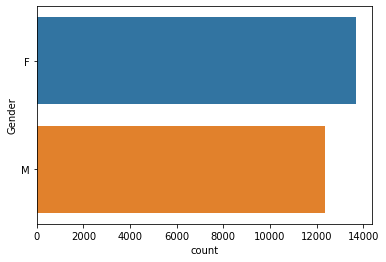

In [35]:
sns.countplot(y='Gender', data=credit_card)
plt.show()

In [ ]:
plt.plot()